#### Attribution

All of the slides in this module are adaptations on materials found at [https://musicinformationretrieval.com/index.htm](https://musicinformationretrieval.com/index.html) and [https://github.com/stevetjoa/musicinformationretrieval.com](https://github.com/stevetjoa/musicinformationretrieval.com) which have been shared under the [MIT license](https://github.com/stevetjoa/musicinformationretrieval.com/blob/gh-pages/LICENSE).

In [1]:
# Run the following in the terminal to install (assumes anaconda)
#!conda install -cy conda-forge librosa

In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (15, 5) # Set default plot size

[&larr; Back to Index](index.html)

# Audio Representation

In performance, musicians convert sheet music representations into **sound** which is transmitted through the air as air pressure oscillations. In essence, sound is simply air vibrating ([Wikipedia](https://en.wikipedia.org/wiki/Sound)).  Sound vibrates through the air as **longitudinal waves**, i.e. the oscillations are parallel to the direction of propagation.

**Audio** refers to the production, transmission, or reception of sounds that are audible by humans. An **audio signal** is a representation of sound that represents the fluctuation in air pressure caused by the vibration as a function of time. Unlike sheet music or symbolic representations, audio representations encode everything that is necessary to reproduce an acoustic realization of a piece of music. However, note parameters such as onsets, durations, and pitches are not encoded explicitly. This makes converting from an audio representation to a
symbolic representation a difficult and ill-defined task.

## Waveforms and the Time Domain

The basic representation of an audio signal is in the **time domain**. 

Let's listen to a file:

In [9]:
c_strum, sr = librosa.load('audio/c_strum.wav')
ipd.Audio(c_strum, rate=sr)

In [10]:
c_strum

array([-3.0517578e-05, -3.0517578e-05, -9.1552734e-05, ...,
        0.0000000e+00, -3.0517578e-05,  3.0517578e-05], dtype=float32)

In [11]:
sr

22050

(If you get an error using `librosa.load`, you may need to [install ffmpeg](https://librosa.github.io/librosa/install.html#ffmpeg).)

The change in air pressure at a certain time is graphically represented by a **pressure-time plot**, or simply **waveform**.

To plot a waveform, use [`librosa.display.waveplot`](http://bmcfee.github.io/librosa/generated/librosa.display.waveplot.html):

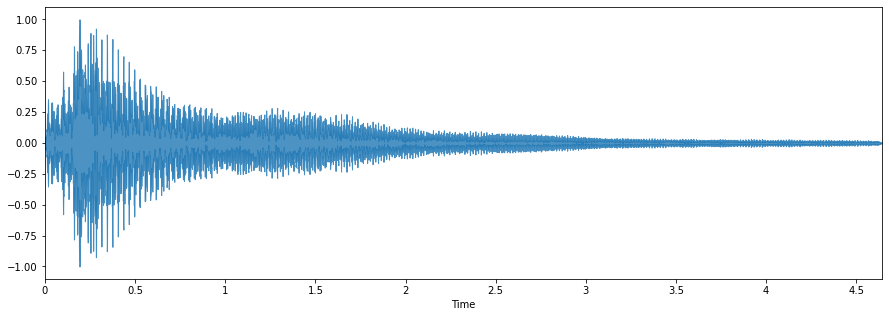

In [12]:
librosa.display.waveplot(c_strum, sr, alpha=0.8)

Digital computers can only capture this data at discrete moments in time. The rate at which a computer captures audio data is called the **sampling frequency** (often abbreviated `fs`) or **sampling rate** (often abbreviated `sr`). For this workshop, we will mostly work with a sampling frequency of 44100 Hz, the sampling rate of CD recordings.

## Pitch and Frequency

**Pitch** ([Wikipedia](https://en.wikipedia.org/wiki/Pitch_(music)) is a perceptual property that indicates how "high" or "low" a note sounds. Pitch is closely related to the fundamental frequency sounded by the note, although fundamental frequency is a physical property of the sound wave.

An **octave** ([Wikipedia](https://en.wikipedia.org/wiki/Octave)) is an interval between two notes where the higher note is twice the fundamental frequency of the lower note. For example, an A at 440 Hz and an A at 880 Hz are separated by one octave. Here are two Cs separated by one octave:

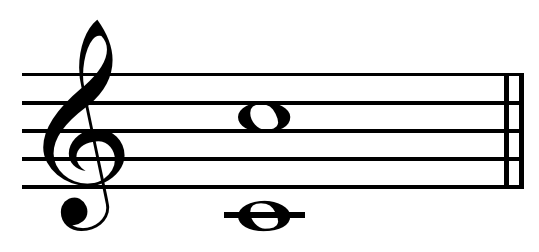

In [7]:
ipd.Image("https://upload.wikimedia.org/wikipedia/commons/a/a5/Perfect_octave_on_C.png")

In [13]:
def make_pitch(f0, T = 2.0, sr = 44100):
    t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
    x = 0.1*numpy.sin(2*numpy.pi*f0*t)
    return (x, sr)

In [14]:
a440, sr = make_pitch(440.0)
a880, sr = make_pitch(880.0)
mix_440_880 = a440 + a880
ipd.Audio(mix_440_880, rate=sr)

#### Waveform plot

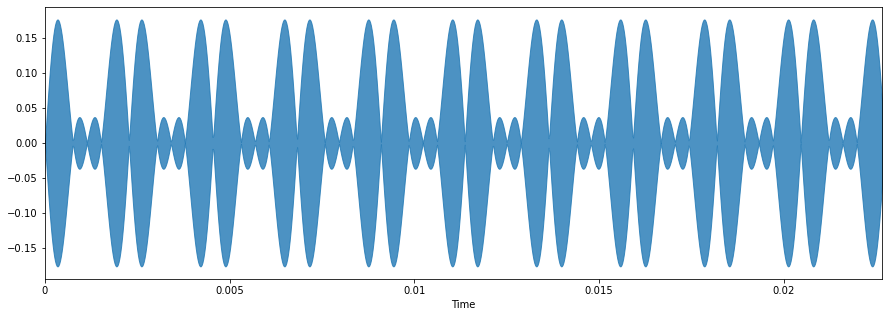

In [16]:
librosa.display.waveplot(mix_440_880[:1000], 44100, alpha=0.8)

#### Frequency plot

In [17]:
def freq_plot(x, low = 0, high = 4096, sr = 44100, max_freq = None):
    X = scipy.fft(x[low:high])
    X_mag = numpy.absolute(X)        # spectral magnitude
    f = numpy.linspace(0, sr, high)  # frequency variable
    cap = high//2 if max_freq == None else int(high*max_freq/sr)
    p = plt.plot(f[:cap], X_mag[:cap]) # magnitude spectrum
    return p

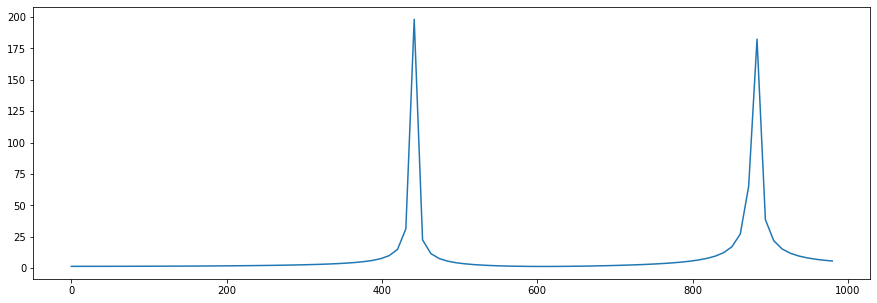

In [18]:
freq_plot(mix_440_880, max_freq=1000)

## Timbre: Temporal Indicators

**Timbre** is the quality of sound that distinguishes the tone of different instruments and voices even if the sounds have the same pitch and loudness.

One characteristic of timbre is its temporal evolution. The **envelope** of a signal is a smooth curve that approximates the amplitude extremes of a waveform over time.

Envelopes are often modeled by the **ADSR model** ([Wikipedia](https://en.wikipedia.org/wiki/Synthesizer#Attack_Decay_Sustain_Release_.28ADSR.29_envelope)) which describes four phases of a sound: attack, decay, sustain, release. 

During the attack phase, the sound builds up, usually with noise-like components over a broad frequency range. Such a noise-like short-duration sound at the start of a sound is often called a transient.

During the decay phase, the sound stabilizes and reaches a steady periodic pattern.

During the sustain phase, the energy remains fairly constant.

During the release phase, the sound fades away.

The ADSR model is a simplification and does not necessarily model the amplitude envelopes of all sounds.

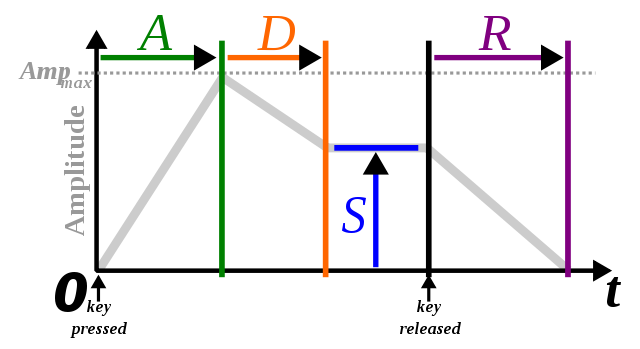

In [14]:
ipd.Image("https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/ADSR_parameter.svg/640px-ADSR_parameter.svg.png")

## Timbre: Spectral Indicators

Another property used to characterize timbre is the existence of partials and their relative strengths. **Partials** are the dominant frequencies in a musical tone with the lowest partial being the **fundamental frequency**.

The partials of a sound are visualized with a **spectrogram**. A spectrogram shows the intensity of frequency components over time. (See [Fourier Transform](fourier_transform.html) and [Short-Time Fourier Transform](stft.html) for more.)

### Pure Tone

Let's synthesize a pure tone at 1047 Hz, concert C6:

In [19]:
T = 2.0 # seconds
f0 = 1047.0
sr = 22050
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
c6 = 0.1*numpy.sin(2*numpy.pi*f0*t)
ipd.Audio(c6, rate=sr)

Display the spectrum of the pure tone:

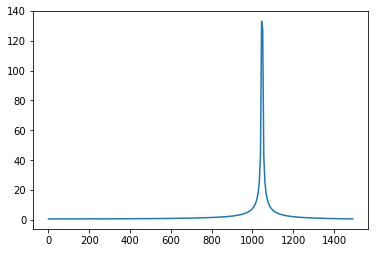

In [16]:
freq_plot(c6, sr=sr, max_freq=1500)

### Oboe

Let's listen to an oboe playing a C6:

In [20]:
oboe, osr = librosa.load('audio/oboe_c6.wav')
ipd.Audio(oboe, rate=osr)

In [21]:
oboe.shape

(23625,)

Display the spectrum of the oboe:

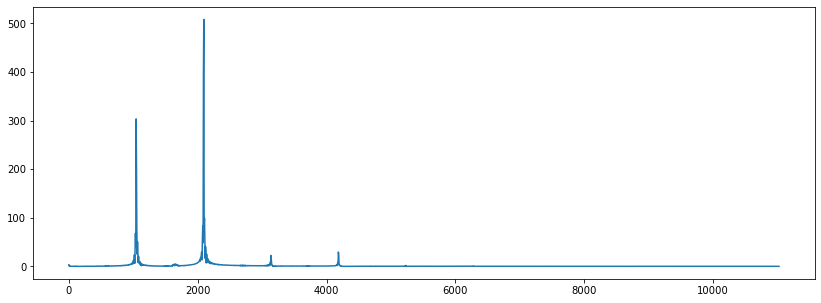

In [22]:
plt.figure(figsize=(14, 5))
freq_plot(oboe, sr=osr)

### Clarinet

Let's listen to a clarinet playing a concert C6:

In [23]:
clar, csr = librosa.load('audio/clarinet_c6.wav')
ipd.Audio(clar, rate=csr)

In [21]:
clar.shape

(51386,)

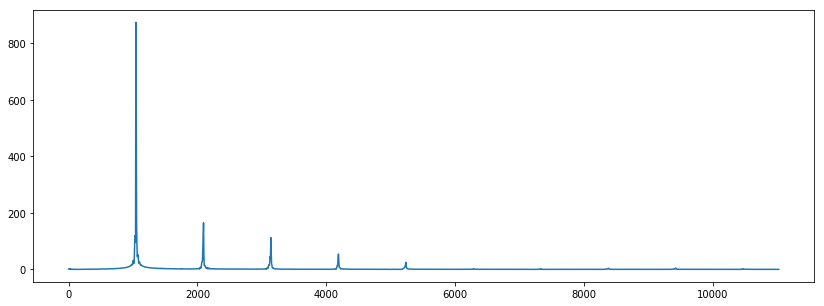

In [22]:
plt.figure(figsize=(14, 5))
freq_plot(clar, sr=csr)

Notice the difference in the relative amplitudes of the partial components. All three signals have approximately the same pitch and fundamental frequency, yet their timbres differ.

[&larr; Back to Index](index.html)